In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_path = "C:/Users/munin/Projects/instacart-market-basket-analysis/"
aisles = pd.read_csv(base_path + "aisles.csv")
departments = pd.read_csv(base_path + "departments.csv")
prior = pd.read_csv(base_path + "order_products__prior.csv")
train = pd.read_csv(base_path + "order_products__train.csv")
orders = pd.read_csv(base_path + "orders.csv")
products = pd.read_csv(base_path + "products.csv")

In [2]:
prior_sample = prior[:10000]
prior_sample

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
9995,1022,21903,1,1
9996,1022,38689,2,1
9997,1022,30391,3,1
9998,1022,18670,4,1


In [3]:
# 불러온 모든 테이블을 합칩니다.
temp = pd.merge(orders, prior_sample, on="order_id")
temp = pd.merge(temp, products, on="product_id")
temp = pd.merge(temp, aisles, on="aisle_id")
temp = pd.merge(temp, departments, on="department_id")
temp

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,40,382,prior,29,1,15,23.0,10070,1,1,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
1,235,58701,prior,20,5,9,9.0,10070,7,1,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
2,581,76141,prior,3,6,17,7.0,10070,3,0,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
3,649,135836,prior,1,4,7,NaN,10070,1,0,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
4,40,382,prior,29,1,15,23.0,34866,4,1,Chocolate Milk 1% Milkfat,84,16,milk,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,152,103040,prior,12,1,10,7.0,5161,3,1,Dried Mango,18,10,bulk dried fruits vegetables,bulk
9996,959,119941,prior,2,6,13,21.0,5161,3,1,Dried Mango,18,10,bulk dried fruits vegetables,bulk
9997,400,180454,prior,32,0,8,8.0,5161,3,1,Dried Mango,18,10,bulk dried fruits vegetables,bulk
9998,18,118860,prior,3,4,20,6.0,1000,3,0,Apricots,18,10,bulk dried fruits vegetables,bulk


In [4]:
X = pd.crosstab(index=temp.user_id, columns=temp.department)
X

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,1,0,2,1,0,0,...,0,0,1,0,0,1,0,0,2,0
971,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1059,0,0,3,0,3,0,0,8,0,0,...,0,1,2,0,0,2,0,0,8,2
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,1
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
X

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,1,0,2,1,0,0,...,0,0,1,0,0,1,0,0,2,0
971,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1059,0,0,3,0,3,0,0,8,0,0,...,0,1,2,0,0,2,0,0,8,2
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,1
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(X)
tsne_data

C:\Users\munin\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\munin\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ 16.959677 ,  19.255966 ],
       [ -4.537078 ,   3.4733632],
       [ 22.42309  ,   8.176074 ],
       ...,
       [  8.334215 ,   5.869476 ],
       [ 15.4898   ,  16.781998 ],
       [-14.064308 ,   2.0824935]], dtype=float32)

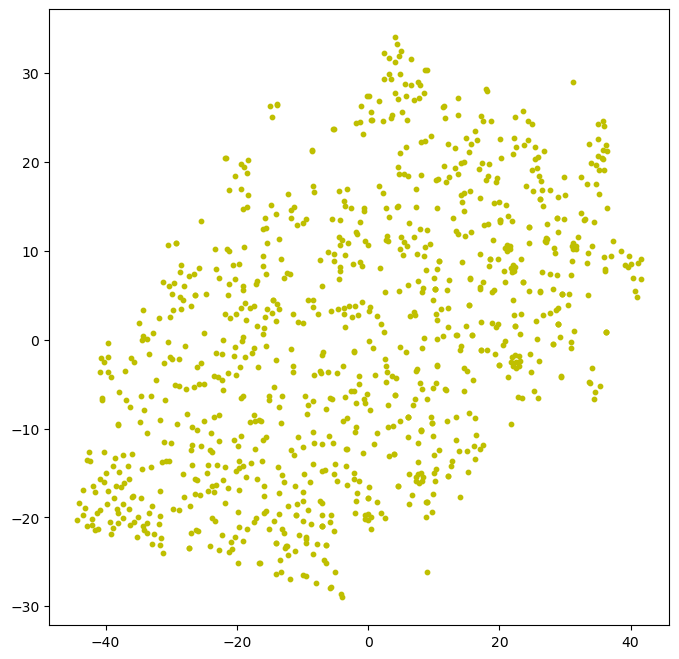

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=10, c='y')
plt.show()

In [8]:
from sklearn.cluster import KMeans                    # 1. K-means
from sklearn.cluster import AgglomerativeClustering   # 2. Hierarchical Agglomerative Clustering
from sklearn.cluster import DBSCAN                    # 3. DBSCAN
from sklearn.cluster import SpectralClustering        # 4. Spectral Clustering

from sklearn.metrics import silhouette_score

model = KMeans(n_clusters=4)
model2 = KMeans(n_clusters=2)
# unsupervised setting
pred = model.fit_predict(X)
pred2 = model2.fit_predict(X)
print("Silhouette Score : %.4f" % silhouette_score(X, pred))
print("Silhouette Score : %.4f" % silhouette_score(X, pred2))

Silhouette Score : 0.1915
Silhouette Score : 0.3641


In [9]:
sse = []
silhouettes = []

for K in range(2, 11):
  model = KMeans(n_clusters=K) # K : 2 ~ 10
  pred = model.fit_predict(X)
  sse.append(model.inertia_) # SSE
  silhouettes.append(silhouette_score(X, pred))

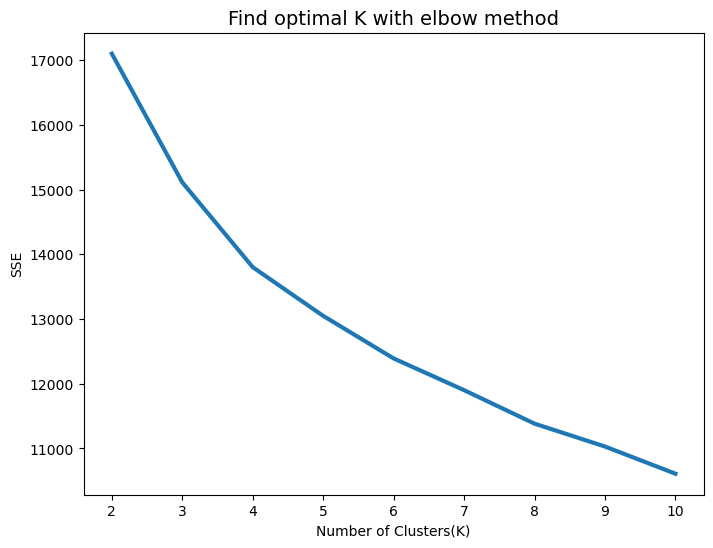

In [10]:
plt.figure(figsize=(8, 6))
plt.title("Find optimal K with elbow method", fontsize=14)
plt.xlabel("Number of Clusters(K)", fontsize=10)
plt.ylabel("SSE", fontsize=10)
plt.plot(range(2, 11), sse, lw=3)
plt.show()

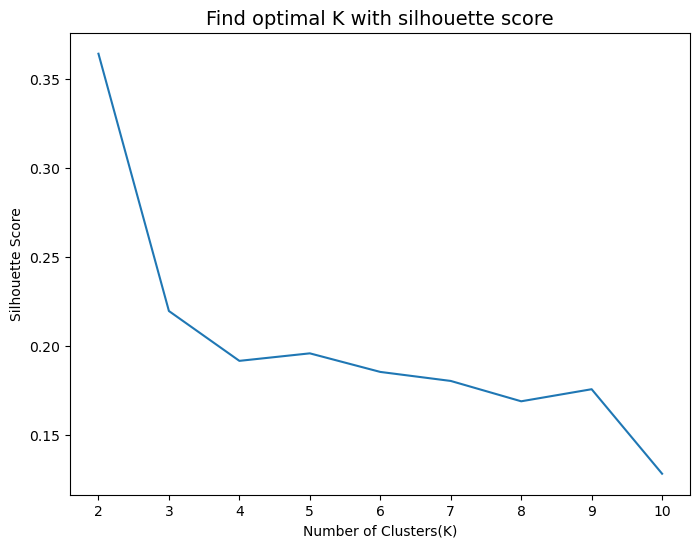

In [11]:
# Silhouette score : 같은 클러스터에 속하는 데이터중 가장 먼 데이터와의 거리와 다른 클러스터에 속하는 데이터 중 가장 가까운 데이터와의 거리 비율을 계산한 지표. [-1, 1]
# Reference : https://en.wikipedia.org/wiki/Silhouette_(clustering)

plt.figure(figsize=(8, 6))
plt.title("Find optimal K with silhouette score", fontsize=14)
plt.xlabel("Number of Clusters(K)", fontsize=10)
plt.ylabel("Silhouette Score", fontsize=10)
plt.plot(range(2, 11), silhouettes)
plt.show()

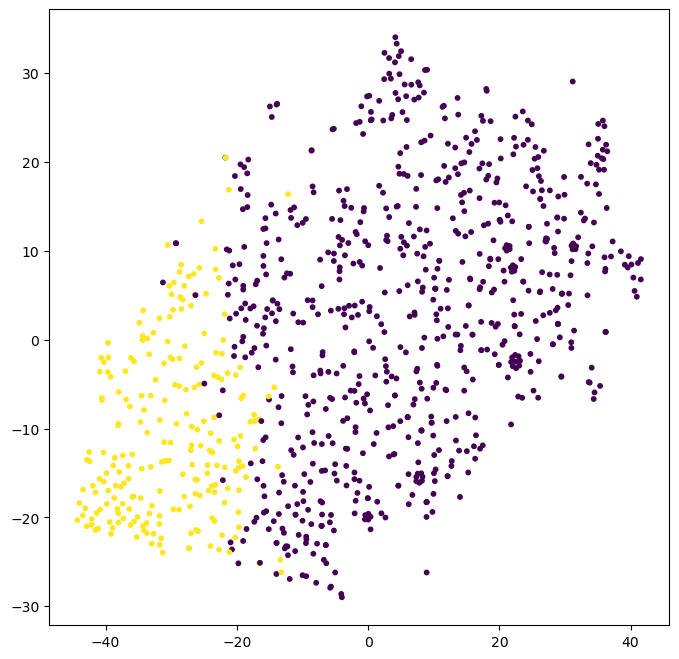

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=10, c=pred2, cmap="viridis")
plt.show()

In [13]:
# see summary
X["cluster_label"] = pred2
X["Cluster_label"] = pred
X

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,cluster_label,Cluster_label
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,1,0,2,1,0,0,...,1,0,0,1,0,0,2,0,0,7
971,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1059,0,0,3,0,3,0,0,8,0,0,...,2,0,0,2,0,0,8,2,1,4
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,4,1,0,7
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
group1 = X.loc[X.Cluster_label == 0, :]
group2 = X.loc[X.Cluster_label == 1, :]
group3 = X.loc[X.Cluster_label == 2, :]
group4 = X.loc[X.Cluster_label == 3, :]
print(group1.shape, group2.shape, group3.shape, group4.shape)

(270, 23) (51, 23) (46, 23) (56, 23)


In [15]:
group1.mean()

department
alcohol            0.066667
babies             0.066667
bakery             0.229630
beverages          0.455556
breakfast          0.137037
bulk               0.000000
canned goods       0.240741
dairy eggs         0.714815
deli               0.166667
dry goods pasta    0.111111
frozen             0.366667
household          0.259259
international      0.051852
meat seafood       0.103704
missing            0.011111
other              0.022222
pantry             0.351852
personal care      0.125926
pets               0.025926
produce            0.400000
snacks             0.451852
cluster_label      0.000000
Cluster_label      0.000000
dtype: float64

In [16]:
group2.mean()

department
alcohol             0.000000
babies              0.254902
bakery              0.568627
beverages           1.078431
breakfast           0.333333
bulk                0.058824
canned goods        0.843137
dairy eggs          2.960784
deli                0.960784
dry goods pasta     0.333333
frozen              1.274510
household           0.176471
international       0.137255
meat seafood        0.274510
missing             0.019608
other               0.000000
pantry              1.019608
personal care       0.098039
pets                0.078431
produce            11.823529
snacks              0.980392
cluster_label       1.000000
Cluster_label       1.000000
dtype: float64

In [17]:
group3.mean()

department
alcohol            0.043478
babies             0.282609
bakery             0.782609
beverages          1.326087
breakfast          0.717391
bulk               0.000000
canned goods       0.521739
dairy eggs         2.565217
deli               0.847826
dry goods pasta    0.391304
frozen             1.260870
household          0.500000
international      0.152174
meat seafood       0.500000
missing            0.000000
other              0.000000
pantry             1.282609
personal care      0.239130
pets               0.043478
produce            5.804348
snacks             3.565217
cluster_label      0.804348
Cluster_label      2.000000
dtype: float64

In [18]:
group4.mean()

department
alcohol            0.017857
babies             0.428571
bakery             0.517857
beverages          0.821429
breakfast          0.464286
bulk               0.017857
canned goods       0.285714
dairy eggs         1.946429
deli               0.321429
dry goods pasta    0.303571
frozen             3.946429
household          0.392857
international      0.125000
meat seafood       0.178571
missing            0.107143
other              0.000000
pantry             0.857143
personal care      0.500000
pets               0.142857
produce            1.642857
snacks             1.267857
cluster_label      0.089286
Cluster_label      3.000000
dtype: float64